In [1]:
!pip install tensorflow
import os
import numpy as np
import pandas as pd 
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential

In [2]:
import matplotlib.image as mpimg
import tensorflow as tf

In [3]:

TRAIN_PATH = 'C:\\Users\\Hello\\Downloads\\horse-or-human\\train\\'
VALIDATION_PATH = 'C:\\Users\\Hello\\Downloads\\horse-or-human\\validation\\'

horses_dir_train = os.path.join(TRAIN_PATH, 'horses')
humans_dir_train = os.path.join(TRAIN_PATH, 'humans')
horses_dir_val = os.path.join(VALIDATION_PATH, 'horses')
humans_dir_val = os.path.join(VALIDATION_PATH, 'humans')


In [4]:
print('Horses Train: ', len(os.listdir(horses_dir_train)))
print('Humans Train: ', len(os.listdir(humans_dir_train)))
print('Horses Val: ', len(os.listdir(horses_dir_val)))
print('Humans Val: ', len(os.listdir(humans_dir_val)))

horses_files_train = os.listdir(horses_dir_train)
humans_files_train = os.listdir(humans_dir_train)
horses_files_val = os.listdir(horses_dir_val)
humans_files_val = os.listdir(humans_dir_val)

print(horses_files_train[:5])
print(humans_files_train[:5])
print(horses_files_val[:5])
print(humans_files_val[:5])

Horses Train:  500
Humans Train:  527
Horses Val:  128
Humans Val:  128
['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png']
['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png']
['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png']


(300, 300, 4)


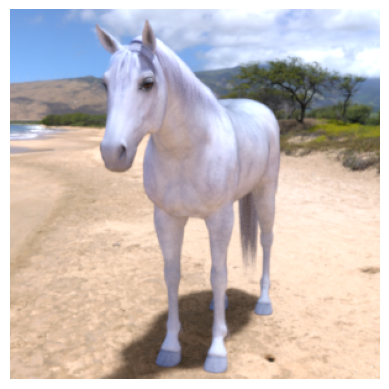

(300, 300, 4)


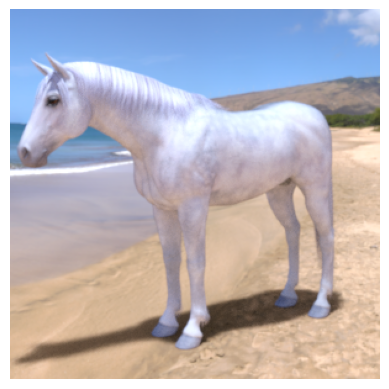

(300, 300, 4)


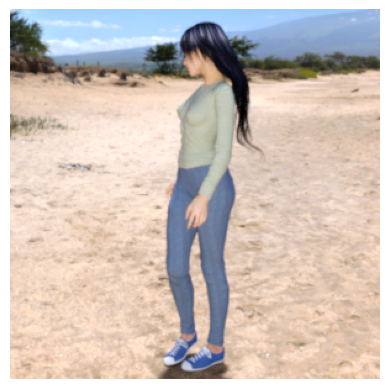

(300, 300, 4)


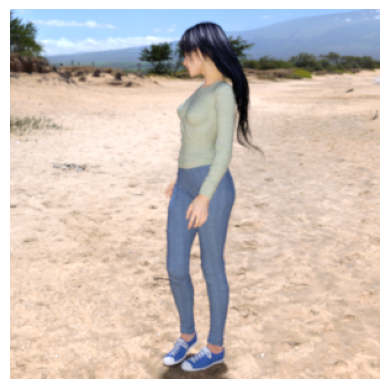

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_horses_train = [os.path.join(horses_dir_train, fname)
                  for fname in horses_files_train[pic_index-2:pic_index]]
next_humans_train = [os.path.join(humans_dir_train, fname)
             for fname in humans_files_train[pic_index-2:pic_index]]


for i, img_path in enumerate(next_horses_train+next_humans_train):
    img = mpimg.imread(img_path)
    print(img.shape)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [6]:
!pip install keras_preprocessing

In [7]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAIN_PATH,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_PATH,
	target_size=(150,150),
	class_mode='categorical'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=5, validation_data = validation_generator, verbose = 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

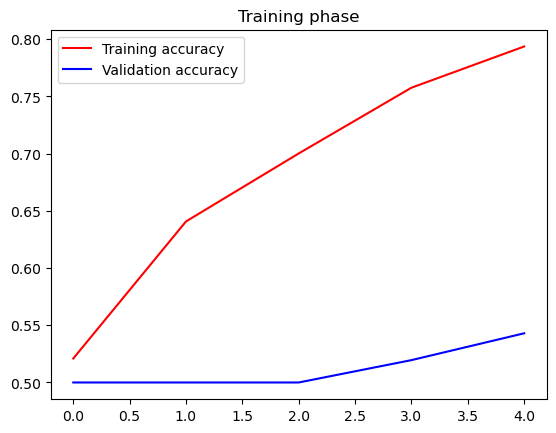

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training phase')
plt.legend(loc=0)
plt.figure()


plt.show()

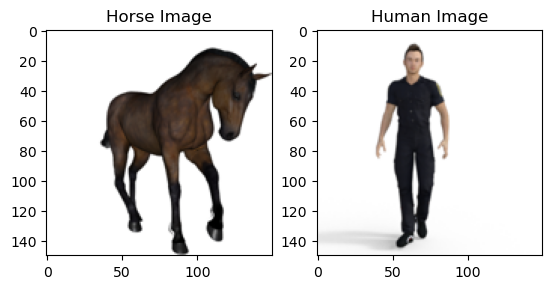

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

image_path1 = "C://Users//Hello//Downloads//horse-or-human//validation//horses//horse1-000.png"
image_path2 = "C://Users//Hello//Downloads//horse-or-human//validation//humans//valhuman01-00.png"

original_image1 = Image.open(image_path1)
original_image2 = Image.open(image_path2)

resized_image1 = original_image1.resize((150, 150))
resized_image2 = original_image2.resize((150, 150))

plt.subplot(1, 2, 1)
plt.imshow(resized_image1)
plt.title("Horse Image")

plt.subplot(1, 2, 2)
plt.imshow(resized_image2)
plt.title("Human Image")

plt.show()


1/1 [==============================] - 0s 37ms/step


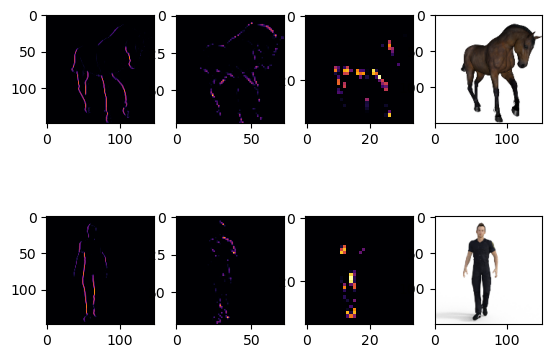

In [12]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

image_path1 = "C:/Users/Hello/Downloads/horse-or-human/validation/horses/horse1-000.png"
image_path2 = "C:/Users/Hello/Downloads/horse-or-human/validation/humans/valhuman01-00.png"

original_image1 = tf.keras.preprocessing.image.load_img(image_path1, target_size=(150, 150))
original_image1 = tf.keras.preprocessing.image.img_to_array(original_image1)

original_image2 = tf.keras.preprocessing.image.load_img(image_path2, target_size=(150, 150))
original_image2 = tf.keras.preprocessing.image.img_to_array(original_image2)

f, axarr = plt.subplots(2, 4) 

CONVOLUTION_LAYER_INDICES = [0, 2, 4, 6]
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

for i, layer_index in enumerate(CONVOLUTION_LAYER_INDICES):
    row = i // 4  
    col = i % 4   
    
    f1 = activation_model.predict(original_image1.reshape(1, 150, 150, 3))[layer_index]
    axarr[row, col].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[row, col].grid(False)
    
    f2 = activation_model.predict(original_image2.reshape(1, 150, 150, 3))[layer_index]
    axarr[row+1, col].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[row+1, col].grid(False)

axarr[0, 3].imshow(original_image1 / 255.0)
axarr[1, 3].imshow(original_image2 / 255.0)

plt.show()


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

validation_data_dir = "C:/Users/Hello/Downloads/horse-or-human/validation"

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)  

batch_size = 32 

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

test_loss, test_accuracy = model.evaluate(validation_generator)
print("Test Accuracy: ", test_accuracy)
print("Test Loss: ", test_loss)


Found 256 images belonging to 2 classes.
8/8 [==============================] - 4s 416ms/step - loss: 0.6888 - accuracy: 0.5781
Test Accuracy:  0.578125
Test Loss:  0.6887535452842712
